In [1]:
import os
import random
import base64
from io import BytesIO
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

In [2]:
def random_color():
    c1 = random.randint(0, 255)
    c2 = random.randint(0, 255)
    c3 = random.randint(0, 255)
    return c1, c2, c3

In [3]:
def generate_picture(width=120, height=35):
    image = Image.new('RGB', (width, height), random_color())
    return image

In [4]:
def random_str():
    '''
    get a random int, or alpha
    :return:
    '''
    random_num = str(random.randint(0, 9))
    random_low_alpha = chr(random.randint(97, 122))
    random_char = random.choice([random_num, random_low_alpha])
    return random_char

In [5]:
def draw_str(count, image, font_size):
    draw = ImageDraw.Draw(image)
    font_file = os.path.join('Andale Mono.ttf')
    font = ImageFont.truetype(font_file, size=font_size)
    temp = []
    for i in range(count):
        random_char = random_str()
        draw.text((10+i*30, -2), random_char, random_color(), font=font)
        temp.append(random_char)

    valid_str = "".join(temp)   
    return valid_str, image

In [6]:
def noise(image, width=120, height=35, line_count=3, point_count=20):
    draw = ImageDraw.Draw(image)
    for i in range(line_count):
        x1 = random.randint(0, width)
        x2 = random.randint(0, width)
        y1 = random.randint(0, height)
        y2 = random.randint(0, height)
        draw.line((x1, y1, x2, y2), fill=random_color())

        # 画点
        for i in range(point_count):
            draw.point([random.randint(0, width), random.randint(0, height)], fill=random_color())
            x = random.randint(0, width)
            y = random.randint(0, height)
            draw.arc((x, y, x + 4, y + 4), 0, 90, fill=random_color())

    return image

In [7]:
def valid_code():
    image = generate_picture()
    valid_str, image = draw_str(4, image, 35)
    image = noise(image)

    f = BytesIO()
    image.save(f, 'png')
    data = f.getvalue()
    f.close()

    encode_data = base64.b64encode(data)
    data = str(encode_data, encoding='utf-8')
    img_data = "data:image/jpeg;base64,{data}".format(data=data)
    return valid_str, img_data

('eo8t', '')

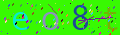

In [8]:
if __name__ == '__main__':
    print(valid_code())